In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree

In [6]:
df= pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [7]:
# describe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


MISSING VALUE

In [9]:
# Menghitung jumlah nilai null pada setiap kolom
null_counts = df.isnull().sum()
null_counts

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

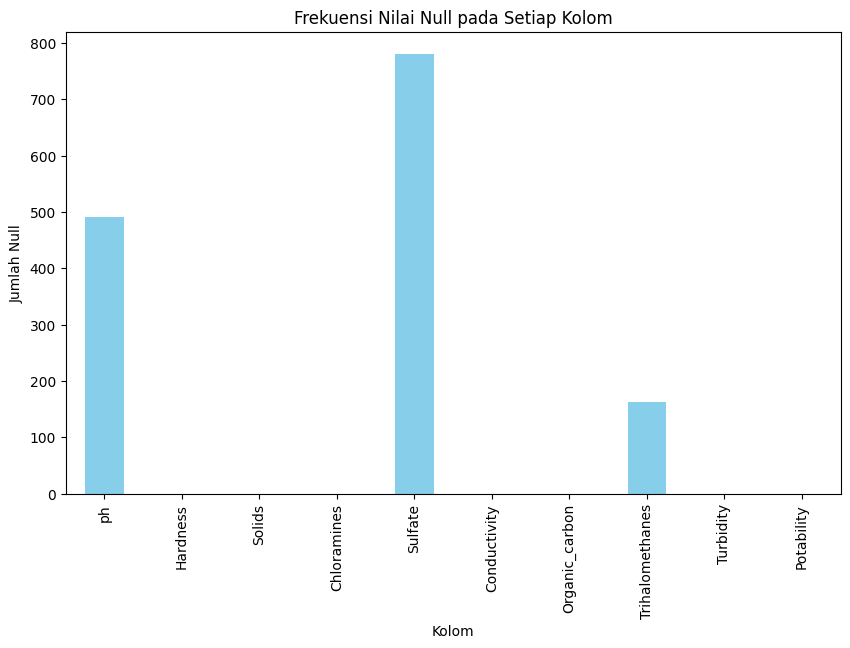

In [10]:
# Membuat bar chart frekuensi nilai null
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Nilai Null pada Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Null')
plt.show()

In [11]:
# # Visualisasi boxplot untuk setiap kolom numerik
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df)
# plt.title('Boxplot untuk Mendeteksi Outlier')
# plt.show()

# # Mendeteksi outlier menggunakan IQR dan menampilkannya
# def detect_outliers(column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
#     print(f'Outliers in column "{column}":\n{outliers}')

# # Deteksi dan tampilkan outlier untuk setiap kolom numerik
# numeric_columns = df.select_dtypes(include=['float64']).columns
# for column in numeric_columns:
#     detect_outliers(column)

PLOT SEBELUM HANDLE MISSING VALUE

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\3209684865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Potability', data=df, palette='viridis')


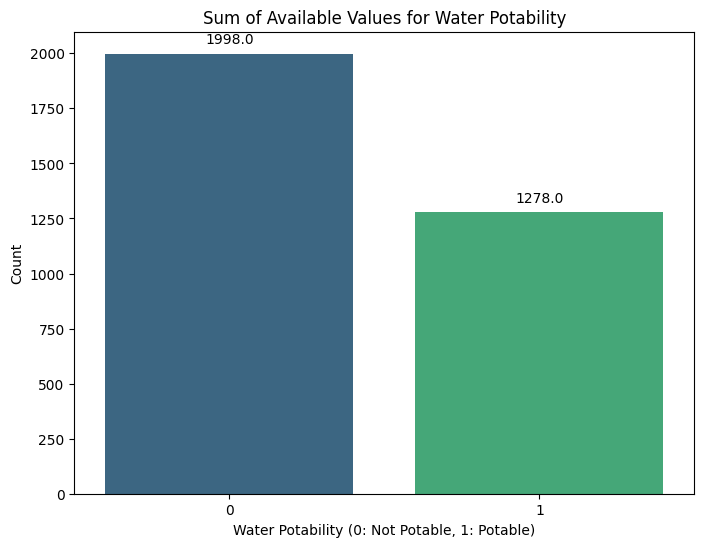

In [12]:
# Mengatur ukuran plot
plt.figure(figsize=(8, 6))

# Membuat countplot untuk potabilitas air
ax = sns.countplot(x='Potability', data=df, palette='viridis')

# Menambahkan label total nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Sum of Available Values for Water Potability')
plt.xlabel('Water Potability (0: Not Potable, 1: Potable)')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, 

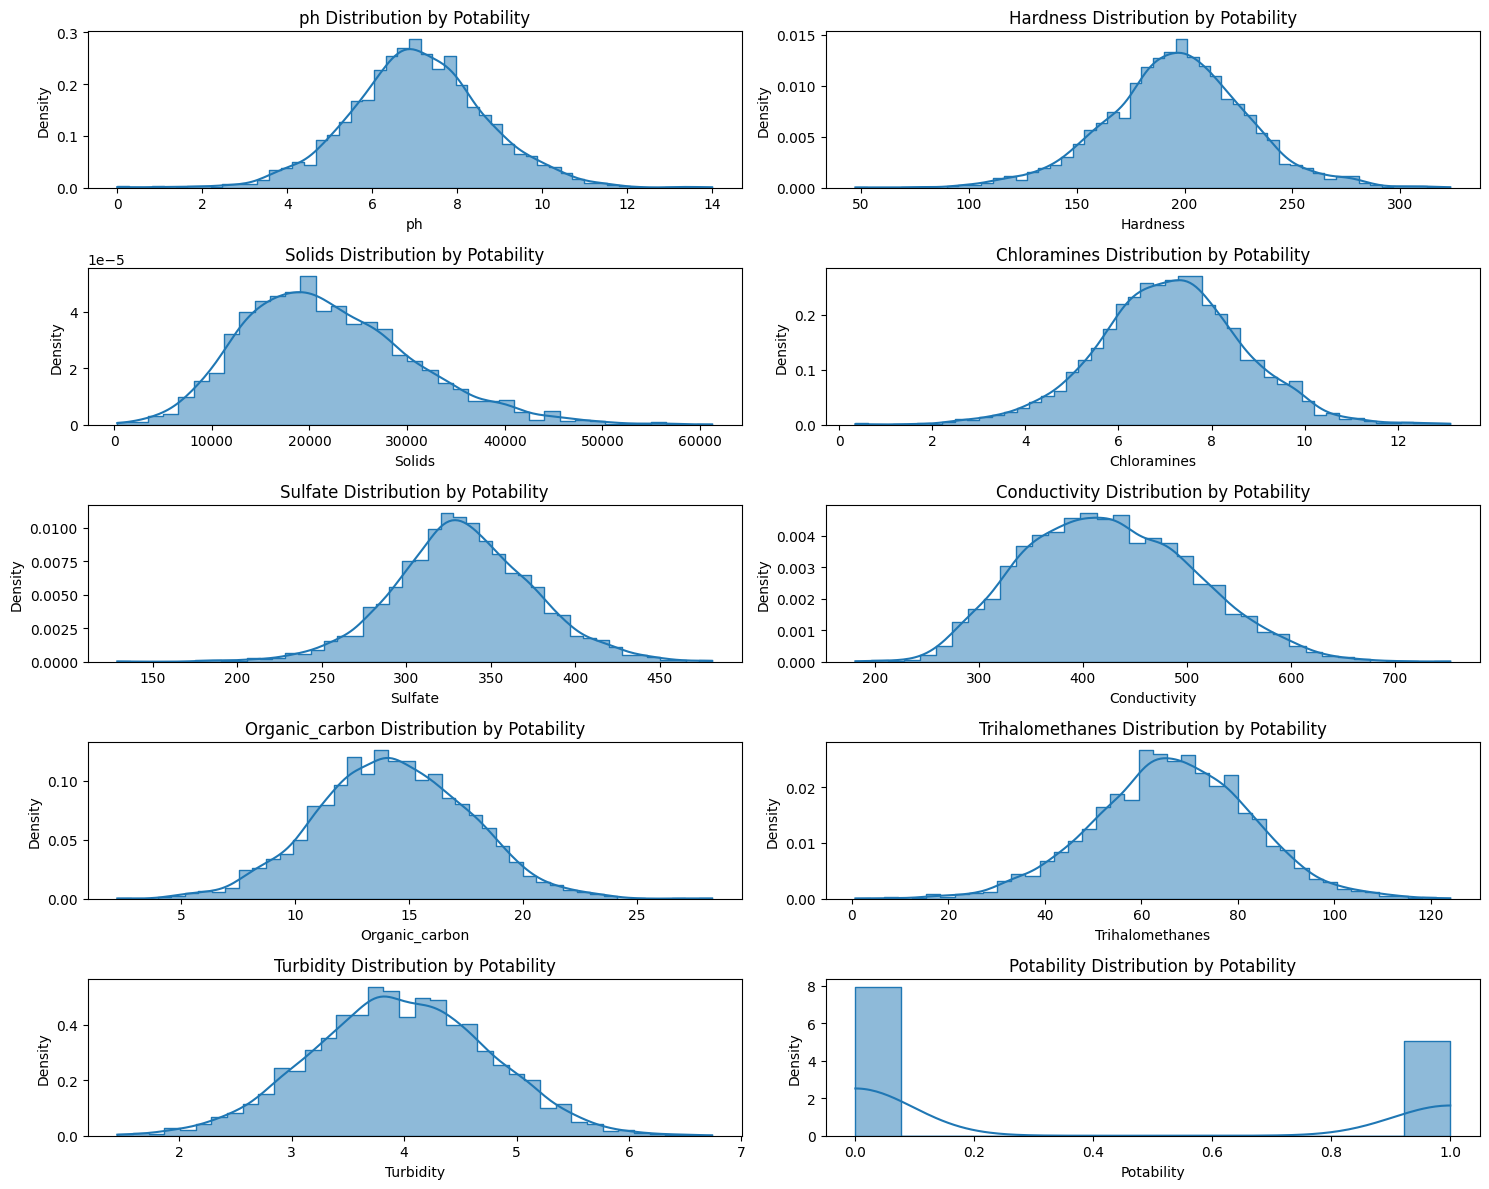

In [13]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 12))

# Loop untuk membuat plot untuk setiap fitur
for i, feature in enumerate(df.columns, 1):
    plt.subplot(5, 2, i)  # 3x3 grid untuk plot
    sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
    plt.title(f'{feature} Distribution by Potability')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Mengatur tata letak plot
plt.tight_layout()
plt.show()

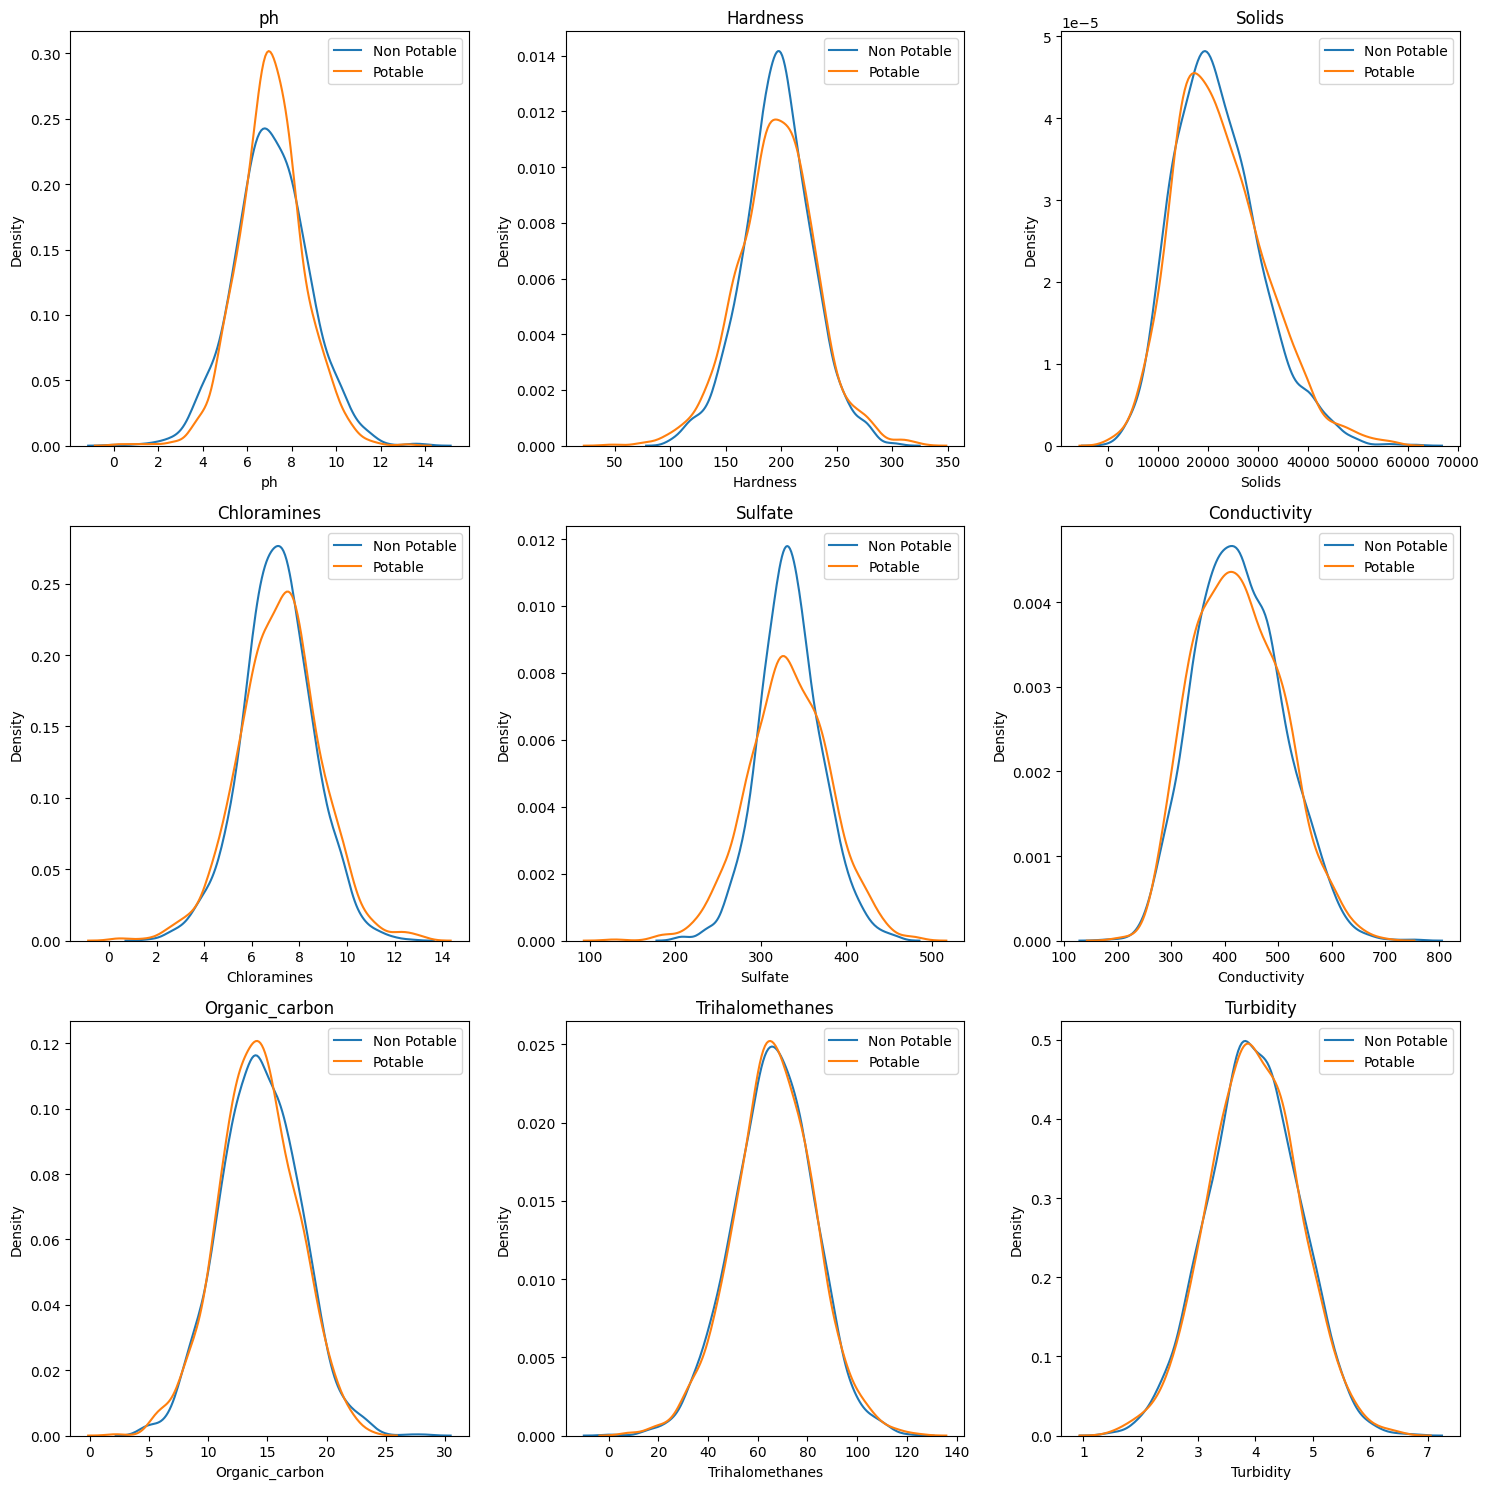

In [14]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

HANDLE MISSING VALUE

In [15]:
#Replacing null values
# df['ph'].fillna(value=df['ph'].mean(), inplace=True)
# df['Sulfate'].fillna(value=df['Sulfate'].mean(), inplace=True)
# df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(), inplace=True)
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
# # Menangani outlier menggunakan IQR
# def handle_outliers(column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Menangani outlier
#     df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# # Loop untuk mendeteksi dan menangani outlier pada setiap kolom numerik
# numeric_columns = df.select_dtypes(include=['float64']).columns
# for column in numeric_columns:
#     handle_outliers(column)

# # Menampilkan data setelah menangani outlier
# print(df)

PLOT SETELAH HANDLE MISSING VALUE

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, 

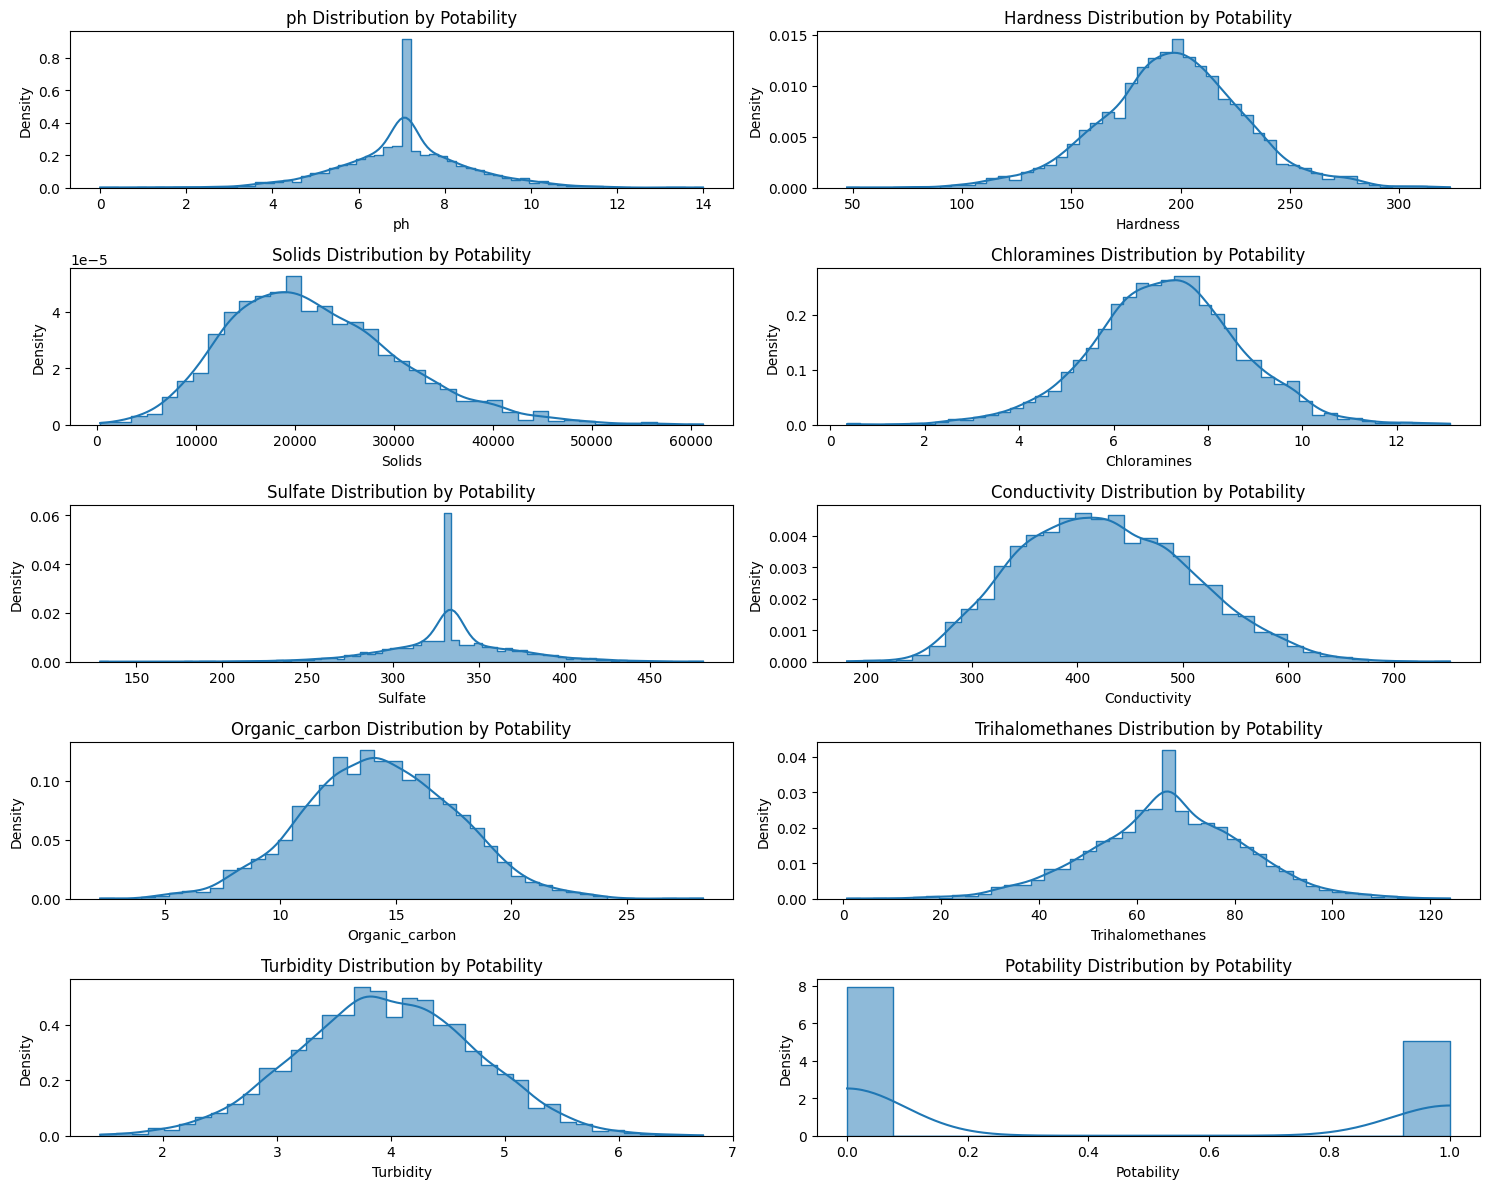

In [17]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 12))

# Loop untuk membuat plot untuk setiap fitur
for i, feature in enumerate(df.columns, 1):
    plt.subplot(5, 2, i)  # 3x3 grid untuk plot
    sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
    plt.title(f'{feature} Distribution by Potability')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Mengatur tata letak plot
plt.tight_layout()
plt.show()

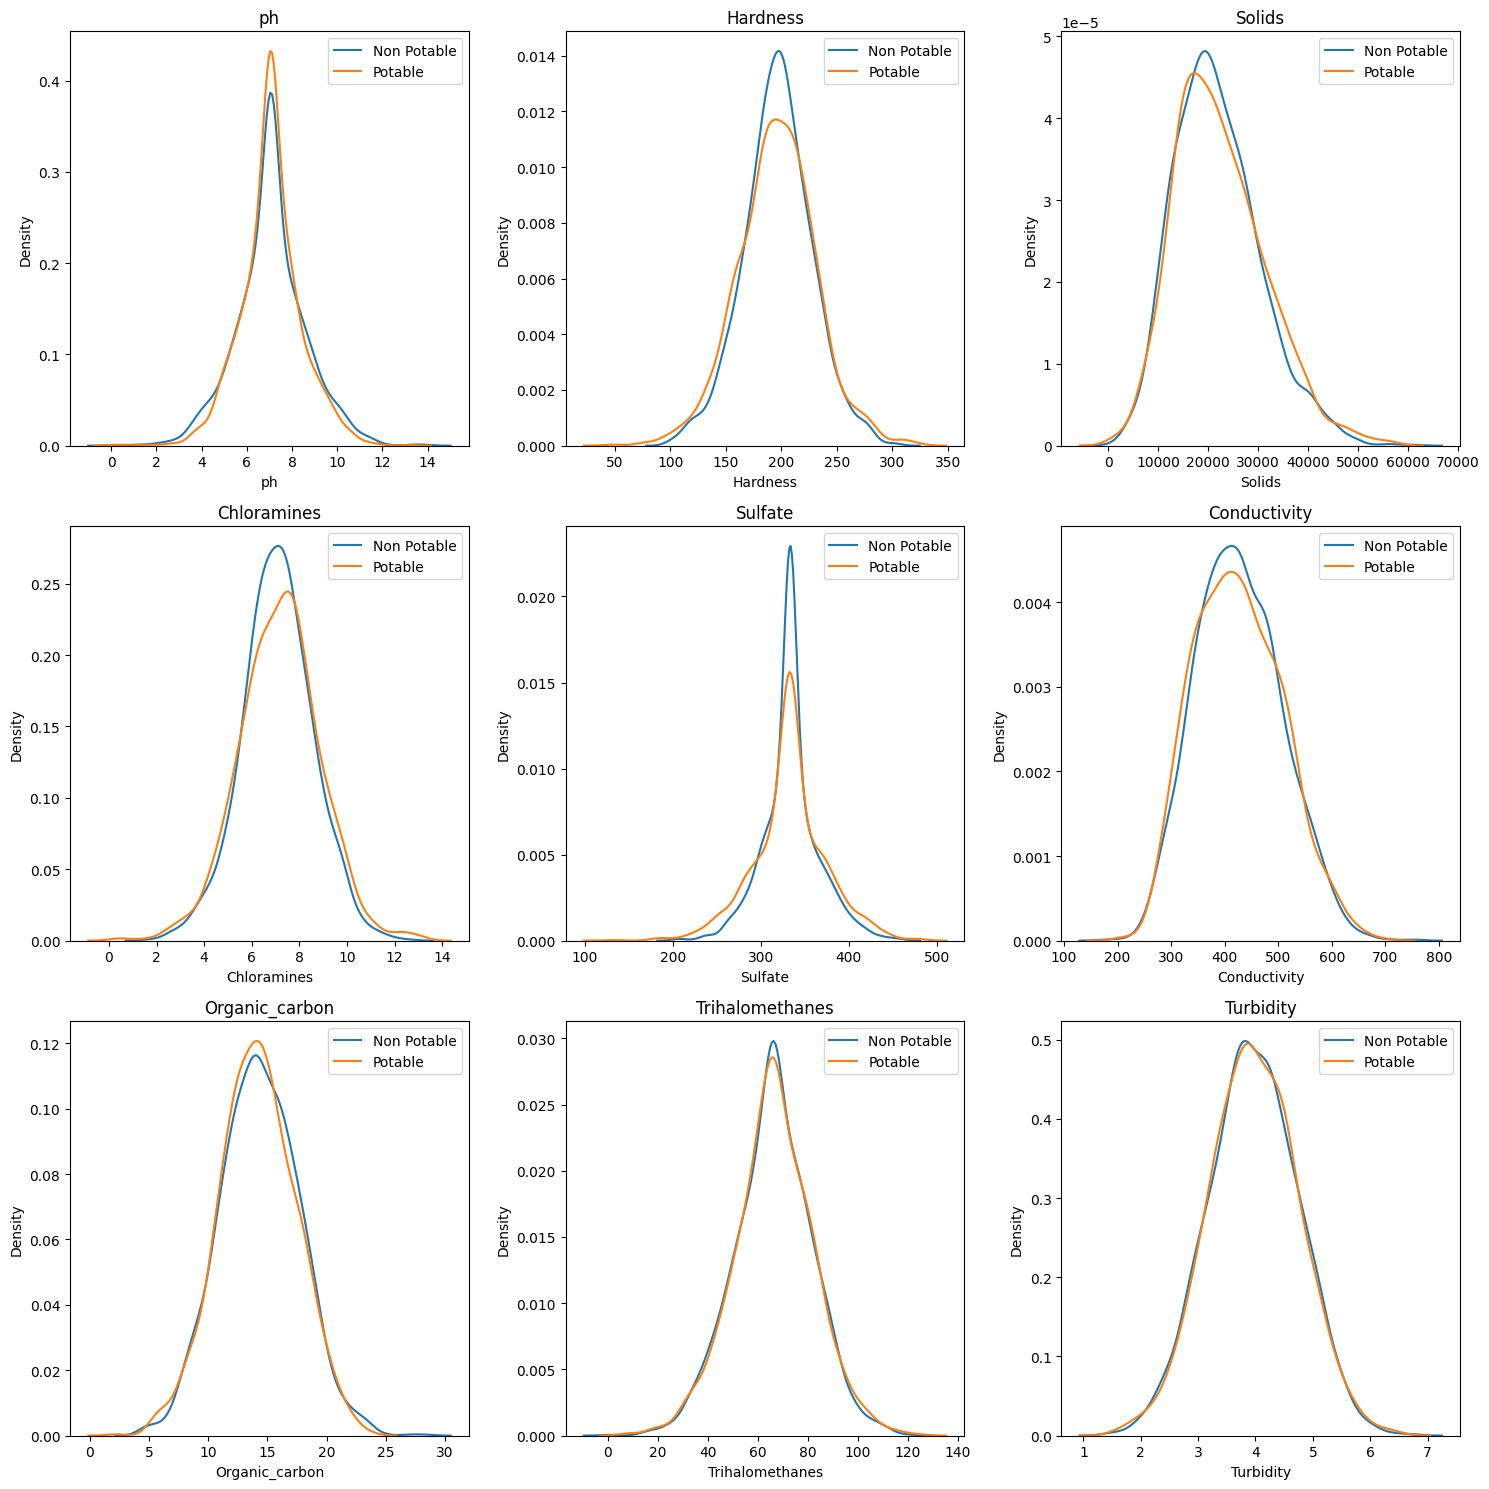

In [18]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

HEATMAP KORELASI MATRIX

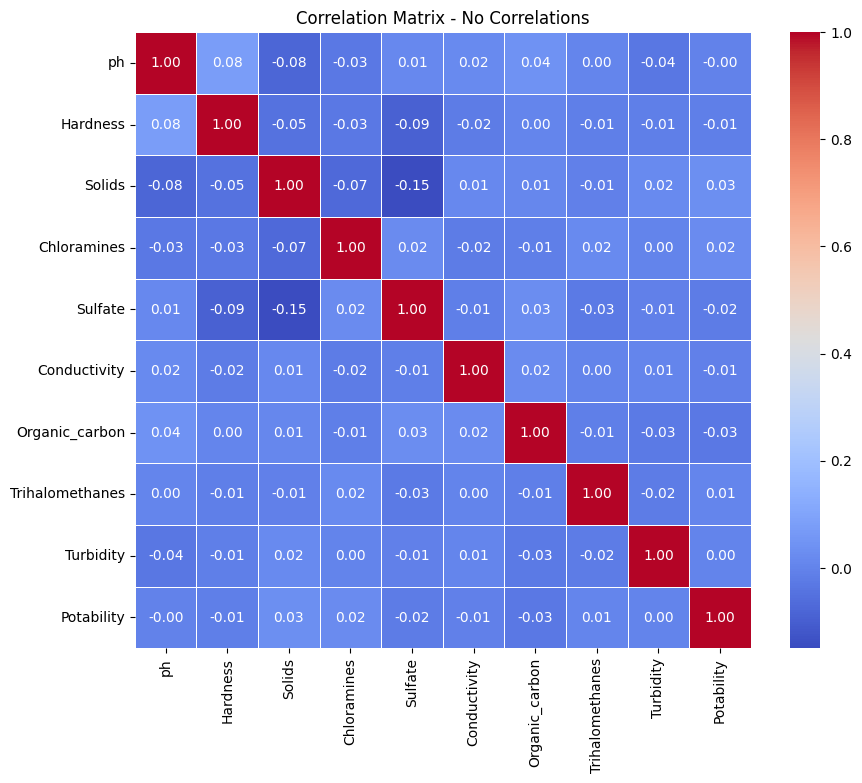

In [19]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Mengatur ukuran plot
plt.figure(figsize=(10, 8))

# Membuat heatmap untuk matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True)

# Menambahkan judul
plt.title('Correlation Matrix - No Correlations')

# Menampilkan plot
plt.show()

SPLIT MODEL DATA TRAIN DAN TEST

In [74]:

X = df.drop(['Potability'], axis=1)
y = df['Potability']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=0)

MODEL RANDOM FOREST CLASSIFIER

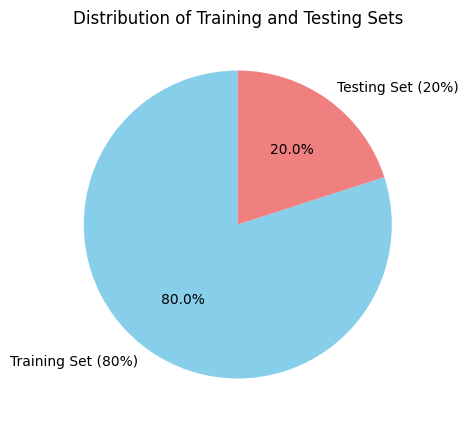

Accuracy Score: 0.6615853658536586

Precision Score: 0.7619047619047619
Recall Score: 0.13114754098360656
F1 Score: 0.22377622377622378

Confusion Matrix:
[[402  10]
 [212  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       412
           1       0.76      0.13      0.22       244

    accuracy                           0.66       656
   macro avg       0.71      0.55      0.50       656
weighted avg       0.69      0.66      0.58       656



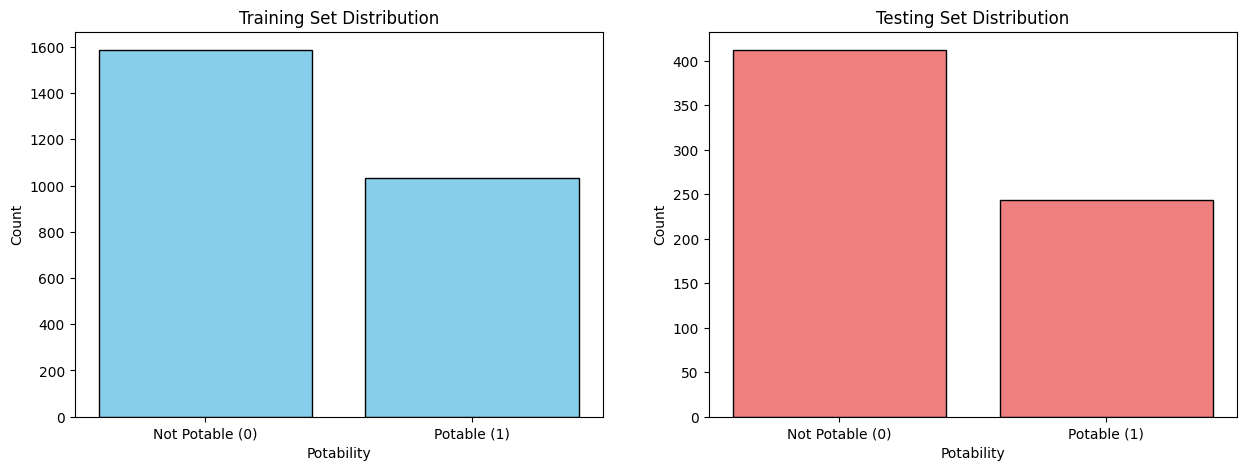

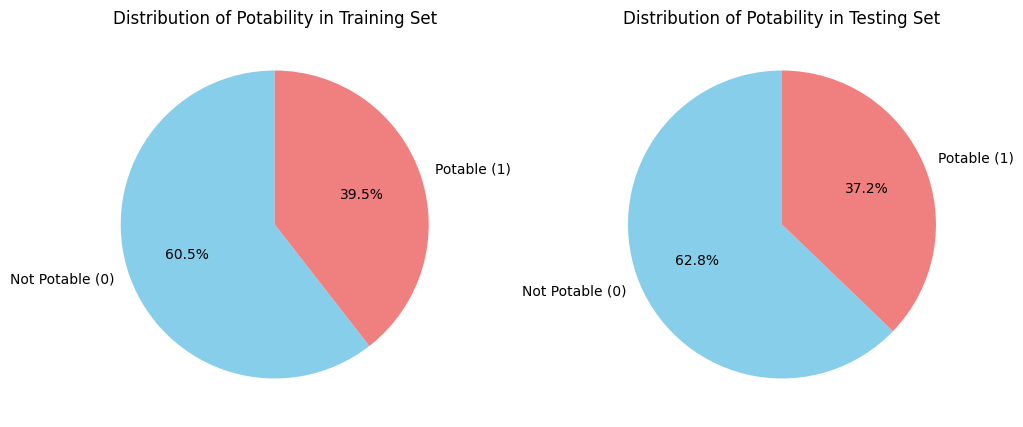

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\225825281.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")


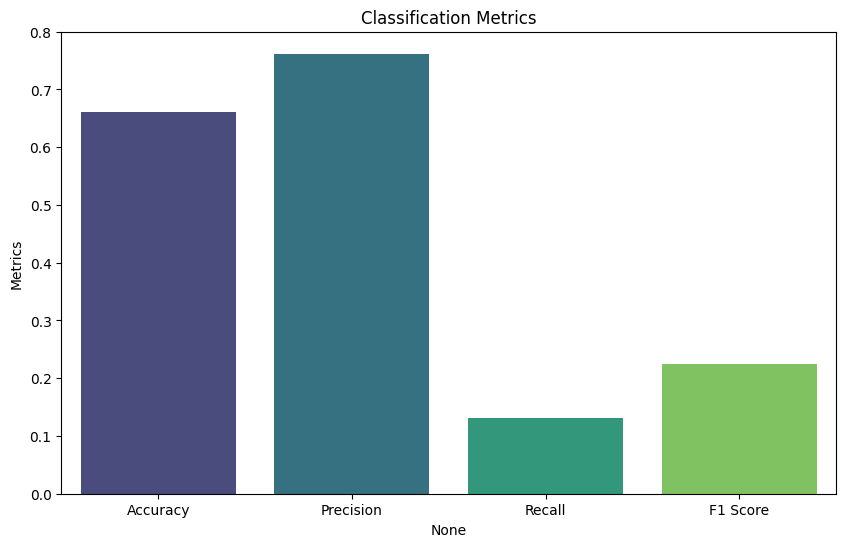

Sulfate            0.278587
ph                 0.169638
Solids             0.131897
Hardness           0.123197
Chloramines        0.112745
Conductivity       0.053105
Trihalomethanes    0.049772
Organic_carbon     0.045558
Turbidity          0.035500
Name: Importance, dtype: float64


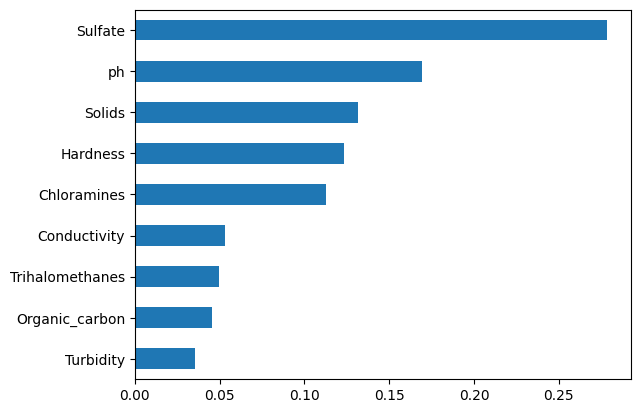

In [20]:

plt.figure(figsize=(8, 5))

labels = ['Training Set (80%)', 'Testing Set (20%)']
sizes = [len(X_train1), len(X_test1)]
colors = ['skyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Training and Testing Sets')

plt.show()
# Melatih model Random Forest Classifier
rf_clas1 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=1)
# Train the model on the entire training set
rf_clas1.fit(X_train1, y_train1)

y_pred_clas1 = rf_clas1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred_clas1)
precision1 = precision_score(y_test1, y_pred_clas1)
recall1 = recall_score(y_test1, y_pred_clas1)
f1_score1 = f1_score(y_test1, y_pred_clas1)

# Menampilkan metrik evaluasi klasifikasi
print("Accuracy Score:", accuracy1)
print("\nPrecision Score:", precision1)
print("Recall Score:", recall1)
print("F1 Score:", f1_score1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test1, y_pred_clas1))
print("\nClassification Report:")
print(classification_report(y_test1, y_pred_clas1))

# Menampilkan distribusi dataset ke dalam set pelatihan dan pengujian
plt.figure(figsize=(15, 5))

# Visualisasi dengan histogram
plt.subplot(1, 2, 1)
plt.hist(y_train1, bins=2, color='skyblue', edgecolor='black', rwidth=0.8)
plt.title('Training Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

plt.subplot(1, 2, 2)
plt.hist(y_test1, bins=2, color='lightcoral', edgecolor='black', rwidth=0.8)
plt.title('Testing Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

# Menampilkan pie chart untuk distribusi kelas pada set pelatihan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
labels_train = ['Not Potable (0)', 'Potable (1)']
sizes_train = [y_train1.value_counts()[0], y_train1.value_counts()[1]]
colors_train = ['skyblue', 'lightcoral']

plt.pie(sizes_train, labels=labels_train, colors=colors_train, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Training Set')

# Menampilkan pie chart untuk distribusi kelas pada set pengujian
plt.subplot(1, 2, 2)
labels_test = ['Not Potable (0)', 'Potable (1)']
sizes_test = [y_test1.value_counts()[0], y_test1.value_counts()[1]]
colors_test = ['skyblue', 'lightcoral']

plt.pie(sizes_test, labels=labels_test, colors=colors_test, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Testing Set')

plt.show()

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({'Accuracy': accuracy1, 'Precision': precision1, 'Recall': recall1, 'F1 Score': f1_score1}, index=['Metrics'])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")
plt.title("Classification Metrics")
plt.show()
model_ranks = pd.Series(rf_clas1.feature_importances_, index=X_train1.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
mr=(model_ranks).sort_values(ascending= False)
print(mr)

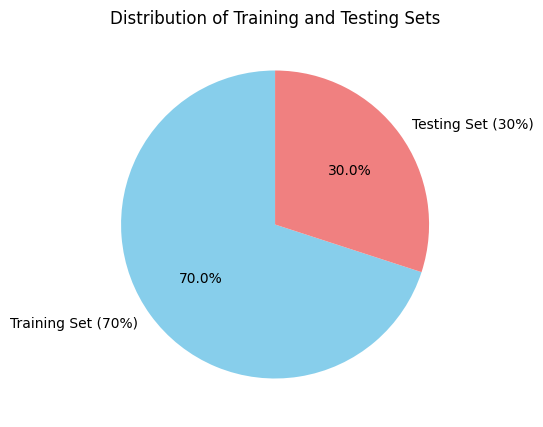

Accuracy Score: 0.6826042726347915

Precision Score: 0.7520661157024794
Recall Score: 0.24396782841823056
F1 Score: 0.3684210526315789

Confusion Matrix:
[[580  30]
 [282  91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       610
           1       0.75      0.24      0.37       373

    accuracy                           0.68       983
   macro avg       0.71      0.60      0.58       983
weighted avg       0.70      0.68      0.63       983



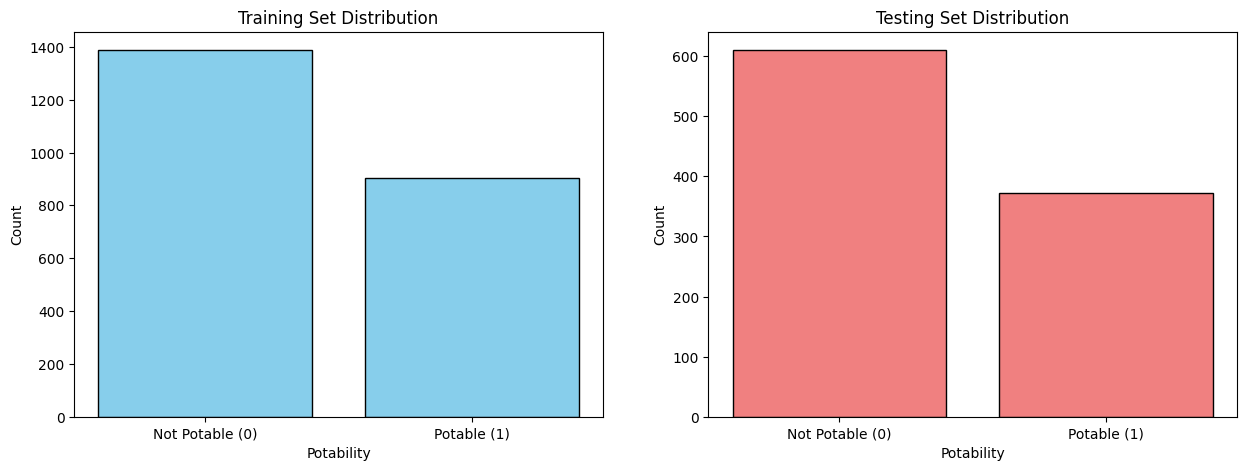

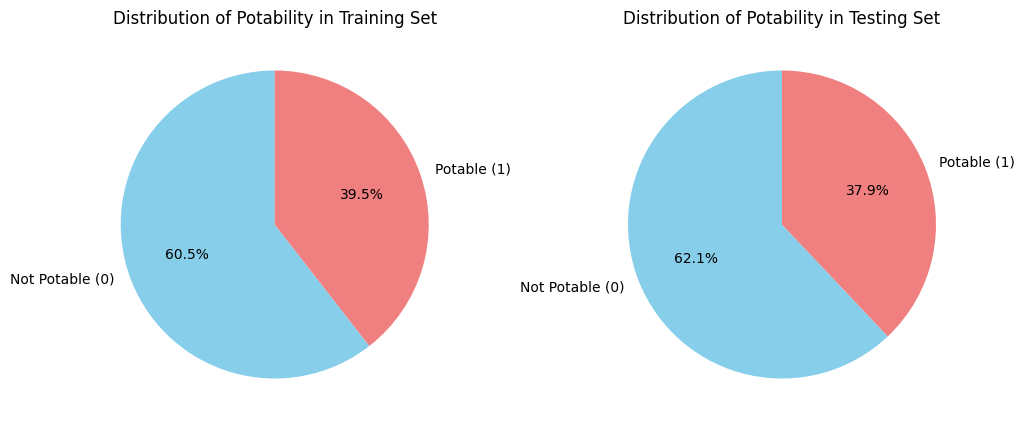

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\2998095198.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")


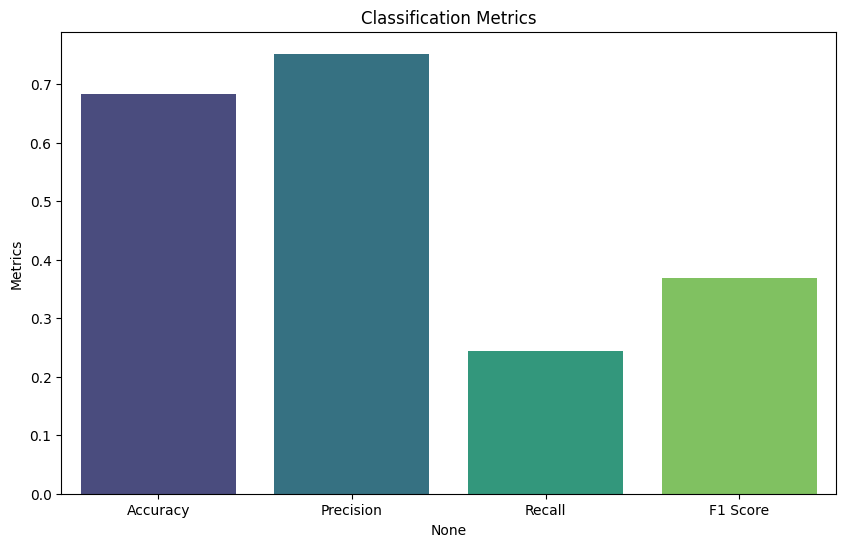

Sulfate            0.177849
ph                 0.157815
Hardness           0.128792
Chloramines        0.118904
Solids             0.114509
Conductivity       0.081791
Organic_carbon     0.077323
Trihalomethanes    0.074782
Turbidity          0.068235
Name: Importance, dtype: float64


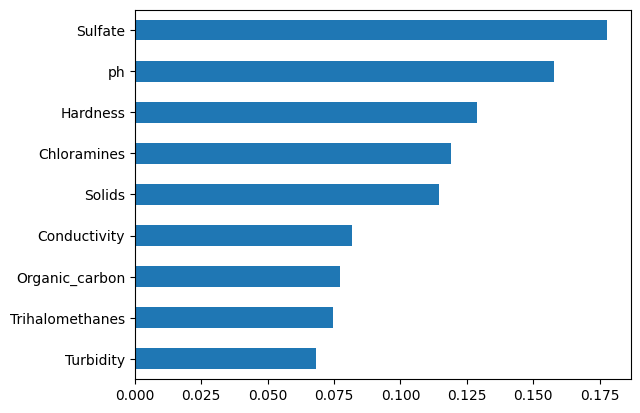

In [21]:
# Memisahkan fitur dan target
X = df.drop(['Potability'], axis=1)
y = df['Potability']



# Menampilkan pie chart untuk distribusi set pelatihan dan pengujian
plt.figure(figsize=(8, 5))

labels = ['Training Set (70%)', 'Testing Set (30%)']
sizes = [len(X_train2), len(X_test2)]
colors = ['skyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Training and Testing Sets')

plt.show()
# Melatih model Random Forest Classifier
rf_clas2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
# Train the model on the entire training set
rf_clas2.fit(X_train2, y_train2)

y_pred_clas2 = rf_clas2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred_clas2)
precision2 = precision_score(y_test2, y_pred_clas2)
recall2 = recall_score(y_test2, y_pred_clas2)
f1_score2 = f1_score(y_test2, y_pred_clas2)

# Menampilkan metrik evaluasi klasifikasi
print("Accuracy Score:", accuracy2)
print("\nPrecision Score:", precision2)
print("Recall Score:", recall2)
print("F1 Score:", f1_score2)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred_clas2))
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_clas2))

# Menampilkan distribusi dataset ke dalam set pelatihan dan pengujian
plt.figure(figsize=(15, 5))

# Visualisasi dengan histogram
plt.subplot(1, 2, 1)
plt.hist(y_train2, bins=2, color='skyblue', edgecolor='black', rwidth=0.8)
plt.title('Training Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

plt.subplot(1, 2, 2)
plt.hist(y_test2, bins=2, color='lightcoral', edgecolor='black', rwidth=0.8)
plt.title('Testing Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

# Menampilkan pie chart untuk distribusi kelas pada set pelatihan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
labels_train = ['Not Potable (0)', 'Potable (1)']
sizes_train = [y_train2.value_counts()[0], y_train2.value_counts()[1]]
colors_train = ['skyblue', 'lightcoral']

plt.pie(sizes_train, labels=labels_train, colors=colors_train, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Training Set')

# Menampilkan pie chart untuk distribusi kelas pada set pengujian
plt.subplot(1, 2, 2)
labels_test = ['Not Potable (0)', 'Potable (1)']
sizes_test = [y_test2.value_counts()[0], y_test2.value_counts()[1]]
colors_test = ['skyblue', 'lightcoral']

plt.pie(sizes_test, labels=labels_test, colors=colors_test, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Testing Set')

plt.show()

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({'Accuracy': accuracy2, 'Precision': precision2, 'Recall': recall2, 'F1 Score': f1_score2}, index=['Metrics'])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")
plt.title("Classification Metrics")
plt.show()
model_ranks = pd.Series(rf_clas2.feature_importances_, index=X_train2.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
mr=(model_ranks).sort_values(ascending= False)
print(mr)

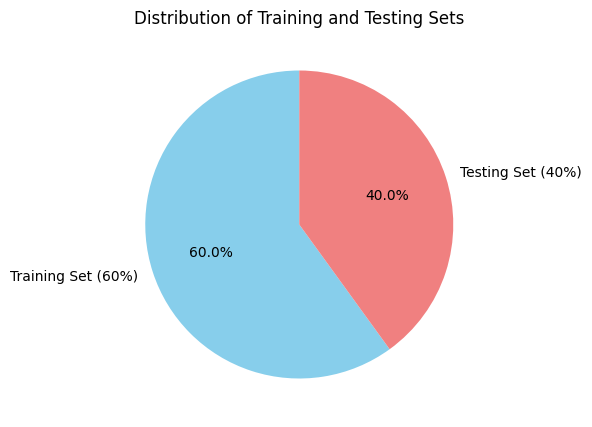

Accuracy Score: 0.6903127383676583

Precision Score: 0.6546184738955824
Recall Score: 0.33747412008281574
F1 Score: 0.44535519125683065

Confusion Matrix:
[[742  86]
 [320 163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       828
           1       0.65      0.34      0.45       483

    accuracy                           0.69      1311
   macro avg       0.68      0.62      0.62      1311
weighted avg       0.68      0.69      0.66      1311



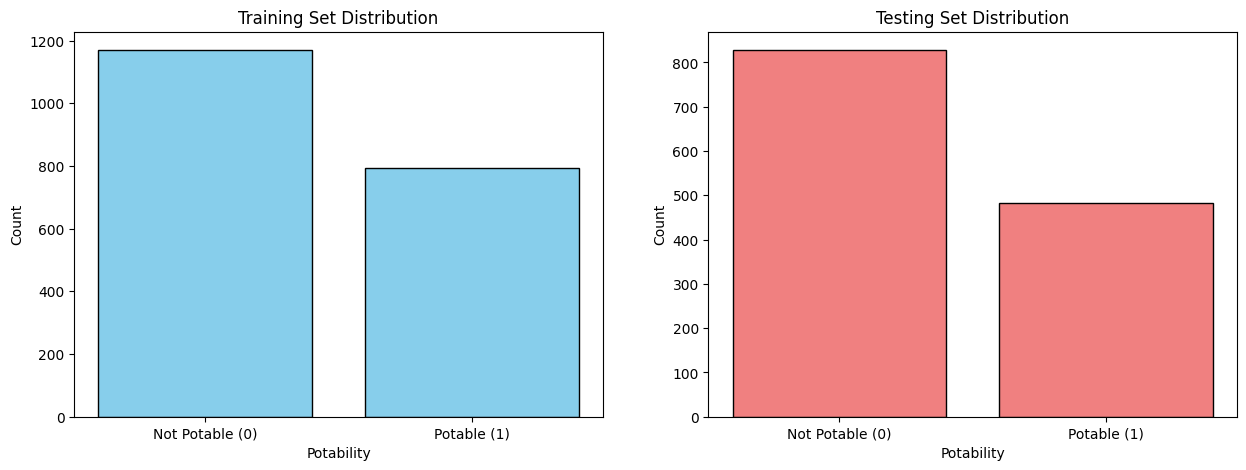

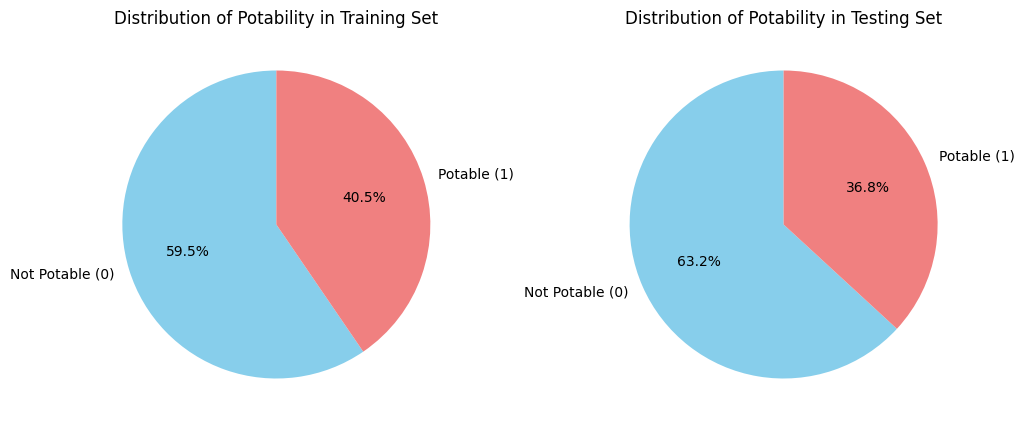

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\1244987702.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")


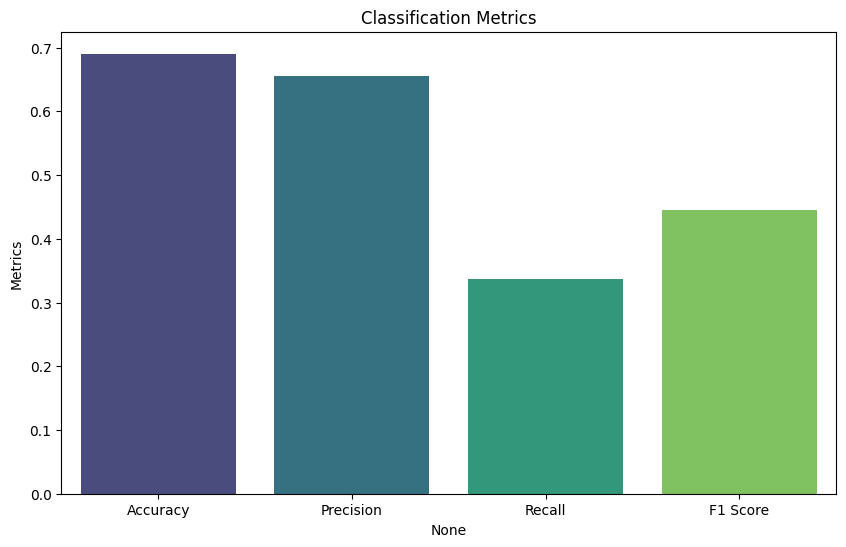

Sulfate            0.136033
ph                 0.134351
Hardness           0.125639
Solids             0.114380
Chloramines        0.111757
Conductivity       0.098735
Organic_carbon     0.093384
Turbidity          0.093268
Trihalomethanes    0.092454
Name: Importance, dtype: float64


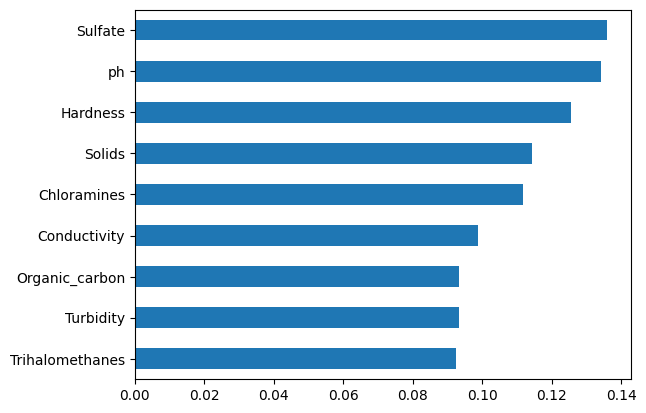

In [22]:
# Memisahkan fitur dan target
X = df.drop(['Potability'], axis=1)
y = df['Potability']

# Membagi dataset menjadi set pelatihan dan pengujian


# Menampilkan pie chart untuk distribusi set pelatihan dan pengujian
plt.figure(figsize=(8, 5))

labels = ['Training Set (60%)', 'Testing Set (40%)']
sizes = [len(X_train3), len(X_test3)]
colors = ['skyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Training and Testing Sets')

plt.show()
# Melatih model Random Forest Classifier
rf_clas3 = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
# Train the model on the entire training set
rf_clas3.fit(X_train3, y_train3)

y_pred_clas3 = rf_clas3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred_clas3)
precision3 = precision_score(y_test3, y_pred_clas3)
recall3 = recall_score(y_test3, y_pred_clas3)
f1_score3 = f1_score(y_test3, y_pred_clas3)

# Menampilkan metrik evaluasi klasifikasi
print("Accuracy Score:", accuracy3)
print("\nPrecision Score:", precision3)
print("Recall Score:", recall3)
print("F1 Score:", f1_score3)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test3, y_pred_clas3))
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_clas3))

# Menampilkan distribusi dataset ke dalam set pelatihan dan pengujian
plt.figure(figsize=(15, 5))

# Visualisasi dengan histogram
plt.subplot(1, 2, 1)
plt.hist(y_train3, bins=2, color='skyblue', edgecolor='black', rwidth=0.8)
plt.title('Training Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

plt.subplot(1, 2, 2)
plt.hist(y_test3, bins=2, color='lightcoral', edgecolor='black', rwidth=0.8)
plt.title('Testing Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

# Menampilkan pie chart untuk distribusi kelas pada set pelatihan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
labels_train = ['Not Potable (0)', 'Potable (1)']
sizes_train = [y_train3.value_counts()[0], y_train3.value_counts()[1]]
colors_train = ['skyblue', 'lightcoral']

plt.pie(sizes_train, labels=labels_train, colors=colors_train, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Training Set')

# Menampilkan pie chart untuk distribusi kelas pada set pengujian
plt.subplot(1, 2, 2)
labels_test = ['Not Potable (0)', 'Potable (1)']
sizes_test = [y_test3.value_counts()[0], y_test3.value_counts()[1]]
colors_test = ['skyblue', 'lightcoral']

plt.pie(sizes_test, labels=labels_test, colors=colors_test, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Testing Set')

plt.show()

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({'Accuracy': accuracy3, 'Precision': precision3, 'Recall': recall3, 'F1 Score': f1_score3}, index=['Metrics'])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")
plt.title("Classification Metrics")
plt.show()
model_ranks = pd.Series(rf_clas3.feature_importances_, index=X_train3.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
mr=(model_ranks).sort_values(ascending= False)
print(mr)

In [23]:
# ytrain_pred=rf.predict(X_train)
# print('The Mean Absolute Error is: %.2f'% mean_absolute_error(y_train, ytrain_pred))
# print('The Mean Square Error is: %.2f'% mean_squared_error(y_train, ytrain_pred))
# print('The Relative Mean Square Error is: %.2f'% np.sqrt(mean_absolute_error(y_train, ytrain_pred)))
# print('The Explianed Variance Score is: %.2f'% explained_variance_score(y_train, ytrain_pred))

FEATURE IMPORTANCE

In [24]:
# Create and train the RandomForestClassifier
# h = RandomForestClassifier(n_estimators=100, random_state=1)
# h.fit(X_train, y_train)

# Get feature importances and create a horizontal bar plot


VISUALISASI KESALAHAN PREDIKSI

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\4249892334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Correct', data=df_errors1, palette='viridis')


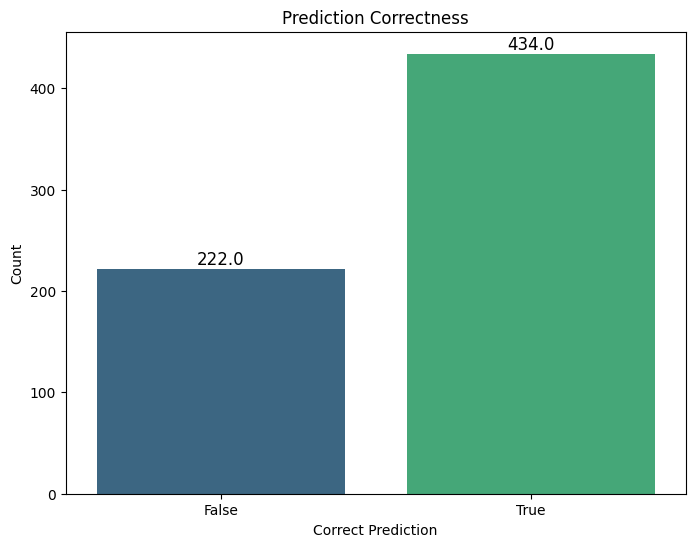

In [25]:
df_errors1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred_clas1, 'Correct': y_test1 == y_pred_clas1})

# Create a bar plot of prediction correctness
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct', data=df_errors1, palette='viridis')
plt.title('Prediction Correctness')
plt.xlabel('Correct Prediction')
plt.ylabel('Count')

# Add actual values on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\1226081993.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Correct', data=df_errors, palette='viridis')


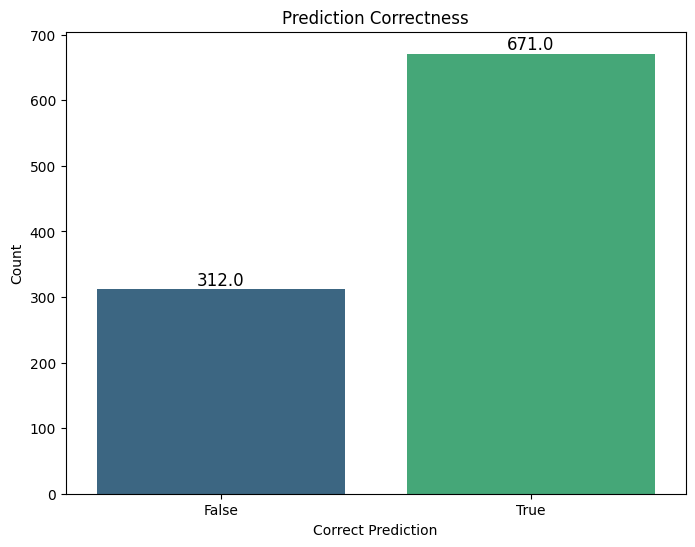

In [26]:
df_errors = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred_clas2, 'Correct': y_test2 == y_pred_clas2})

# Create a bar plot of prediction correctness
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct', data=df_errors, palette='viridis')
plt.title('Prediction Correctness')
plt.xlabel('Correct Prediction')
plt.ylabel('Count')

# Add actual values on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\3779531145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Correct', data=df_errors, palette='viridis')


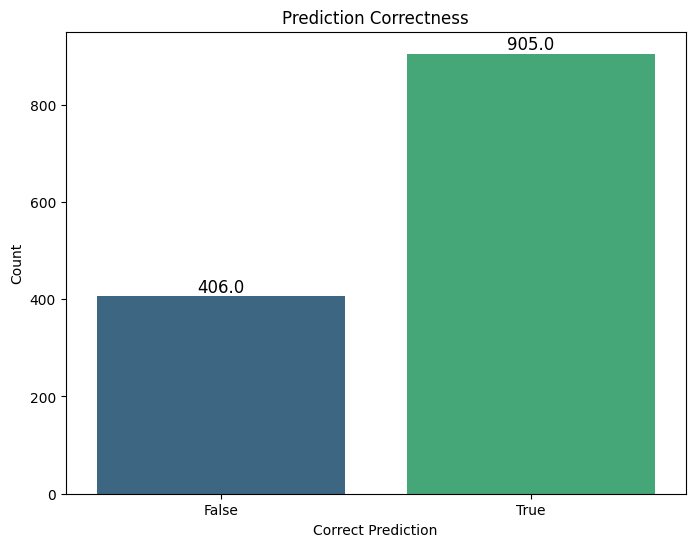

In [27]:
df_errors = pd.DataFrame({'Actual': y_test3, 'Predicted': y_pred_clas3, 'Correct': y_test3 == y_pred_clas3})

# Create a bar plot of prediction correctness
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct', data=df_errors, palette='viridis')
plt.title('Prediction Correctness')
plt.xlabel('Correct Prediction')
plt.ylabel('Count')

# Add actual values on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

PERBANDINGAN AKURASI IMPLEMENTASI DENGAN YANG ADA DI PAPER

C:\Users\muzak\AppData\Local\Temp\ipykernel_22488\288422807.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


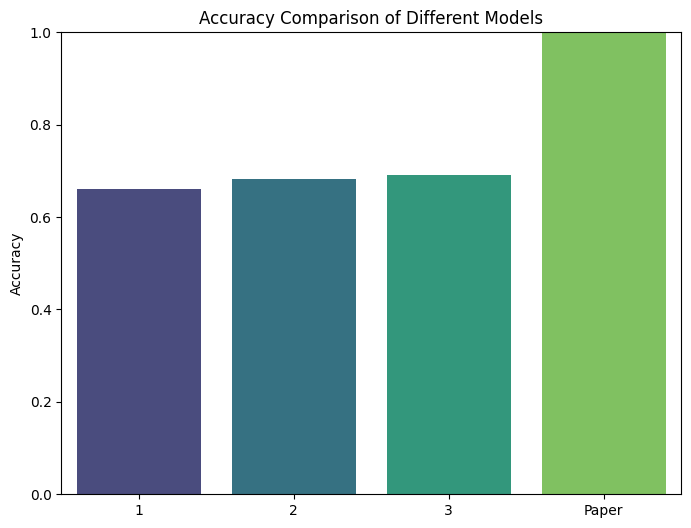

In [28]:
# Replace these with your actual accuracy scores
paper_accuracy = 1

# Data preparation
models = ['1','2','3', 'Paper']
accuracy_scores = [accuracy1,accuracy2,accuracy3, paper_accuracy]

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy scores between 0 and 1
plt.ylabel('Accuracy')
plt.show()

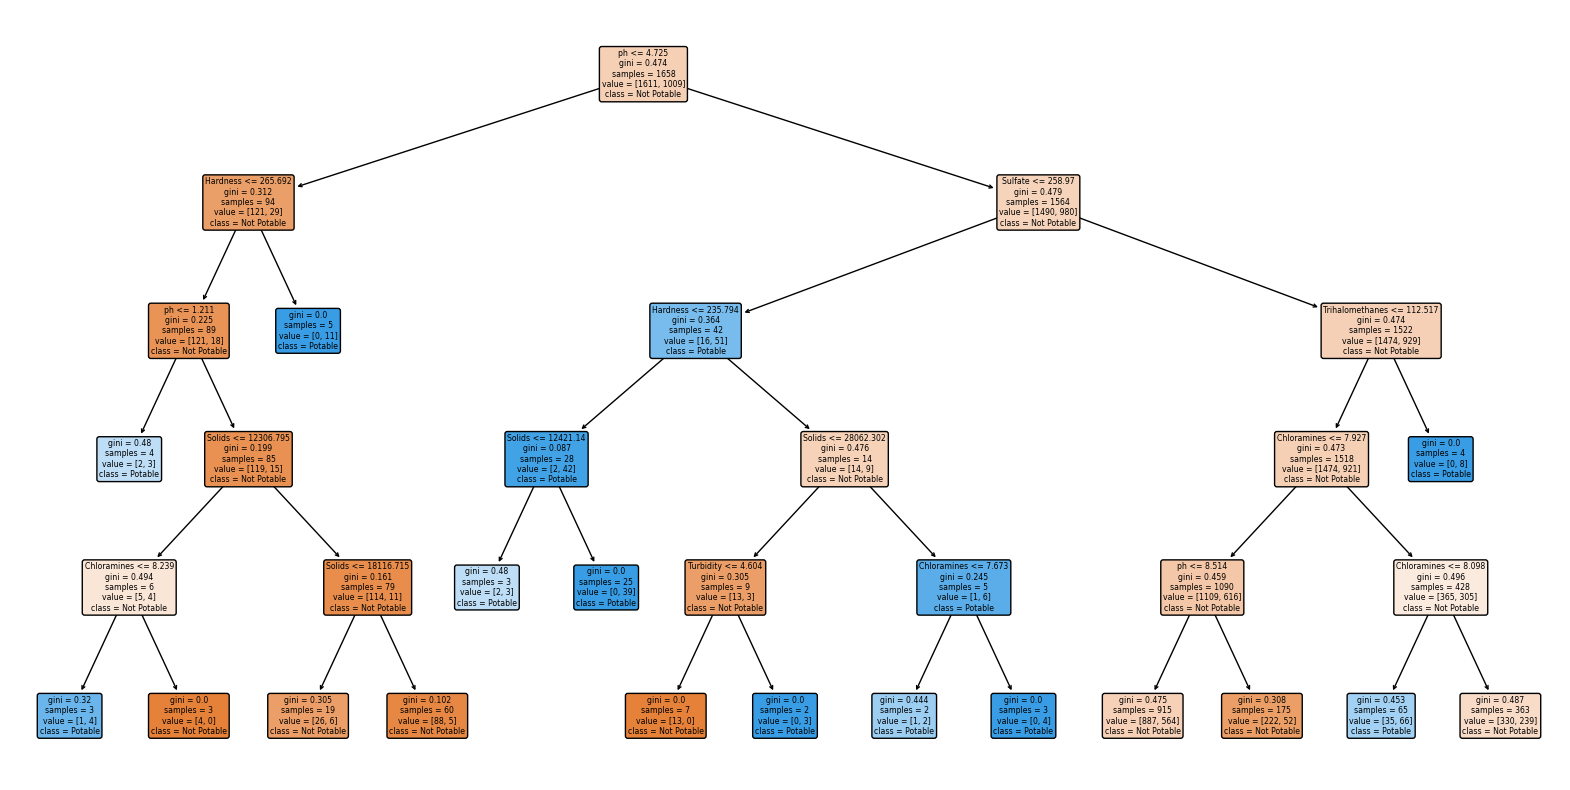

In [29]:
# Import library
from sklearn.tree import plot_tree
# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
# model.fit(X_train, y_train)

# Visualisasi pohon keputusan (hanya menunjukkan satu pohon, bukan keseluruhan ensemble)
plt.figure(figsize=(20, 10))
plot_tree(rf_clas1.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()


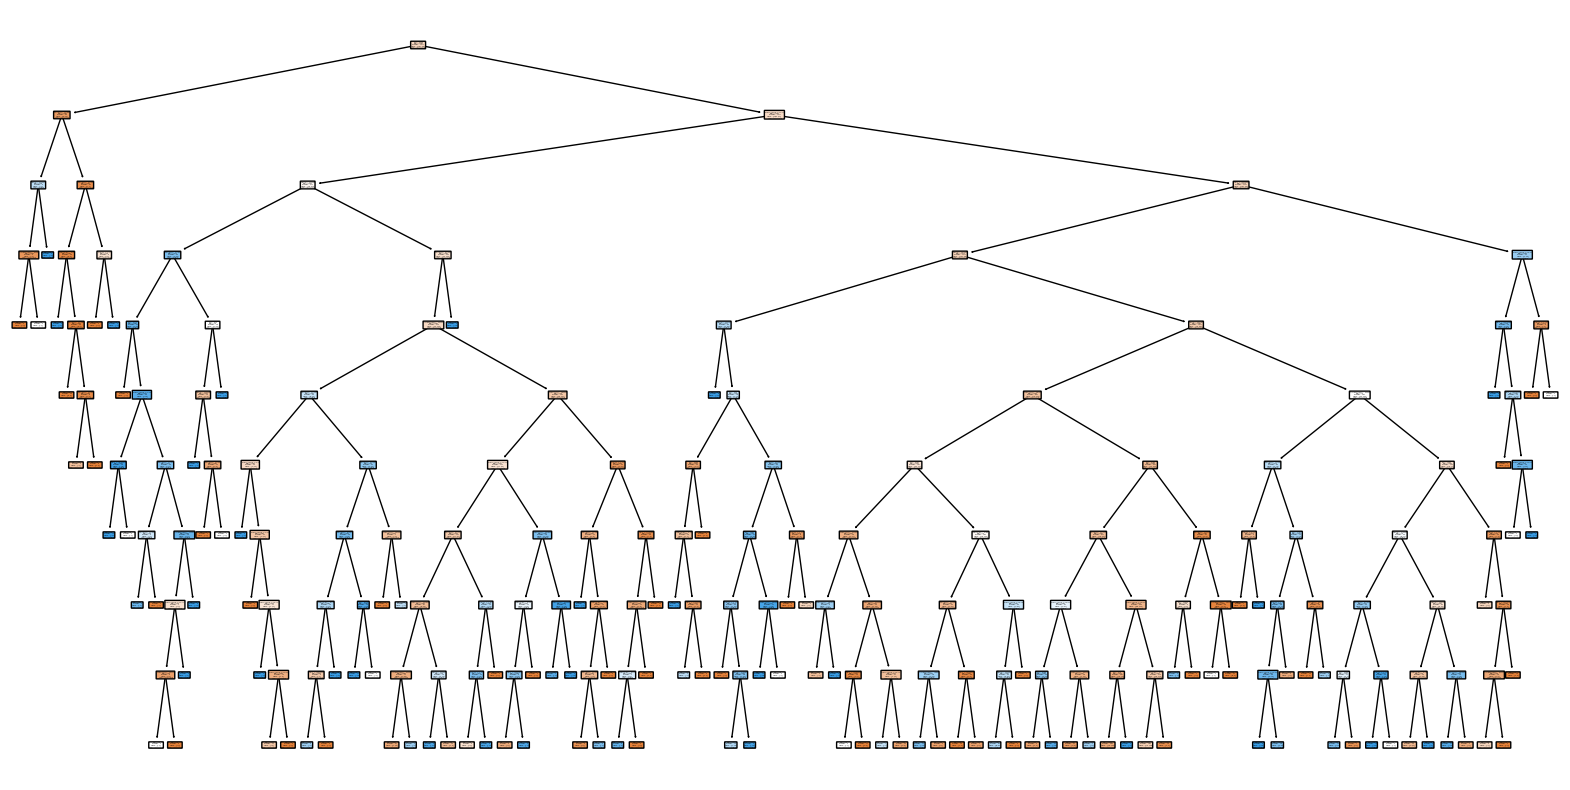

In [30]:
# Import library
from sklearn.tree import plot_tree
# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
# model.fit(X_train, y_train)

# Visualisasi pohon keputusan (hanya menunjukkan satu pohon, bukan keseluruhan ensemble)
plt.figure(figsize=(20, 10))
plot_tree(rf_clas2.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()


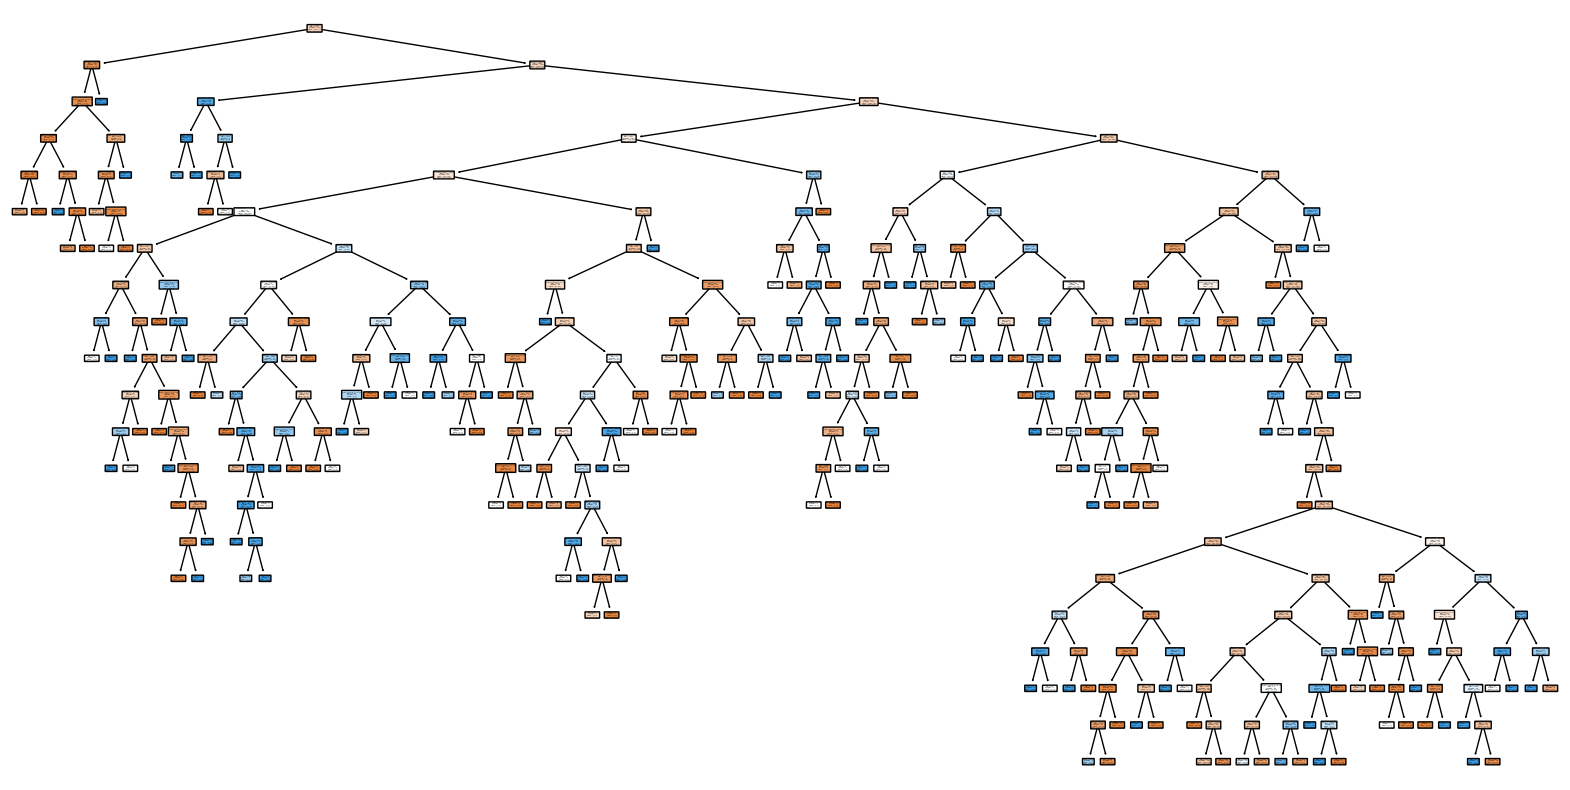

In [31]:
# Import library
from sklearn.tree import plot_tree
# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
# model.fit(X_train, y_train)

# Visualisasi pohon keputusan (hanya menunjukkan satu pohon, bukan keseluruhan ensemble)
plt.figure(figsize=(20, 10))
plot_tree(rf_clas3.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()


Skema 1 n_estimator = 100 maxdept = 5


Confusion Matrix Test Size 1:
[[402  10]
 [212  32]]

Classification Report Test Size 1:
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       412
           1       0.76      0.13      0.22       244

    accuracy                           0.66       656
   macro avg       0.71      0.55      0.50       656
weighted avg       0.69      0.66      0.58       656


Confusion Matrix Test Size 2:
[[591  19]
 [312  61]]

Classification Report Test Size 2:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       610
           1       0.76      0.16      0.27       373

    accuracy                           0.66       983
   macro avg       0.71      0.57      0.53       983
weighted avg       0.70      0.66      0.59       983


Confusion Matrix Test Size 3:
[[803  25]
 [406  77]]

Classification Report Test Size 3:
              precision    recall  f1-score   support

           0       0.

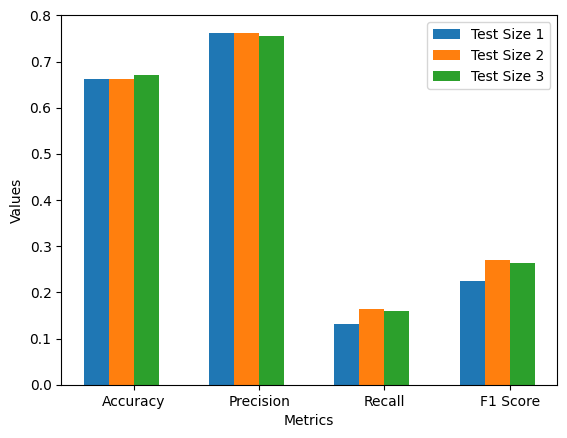

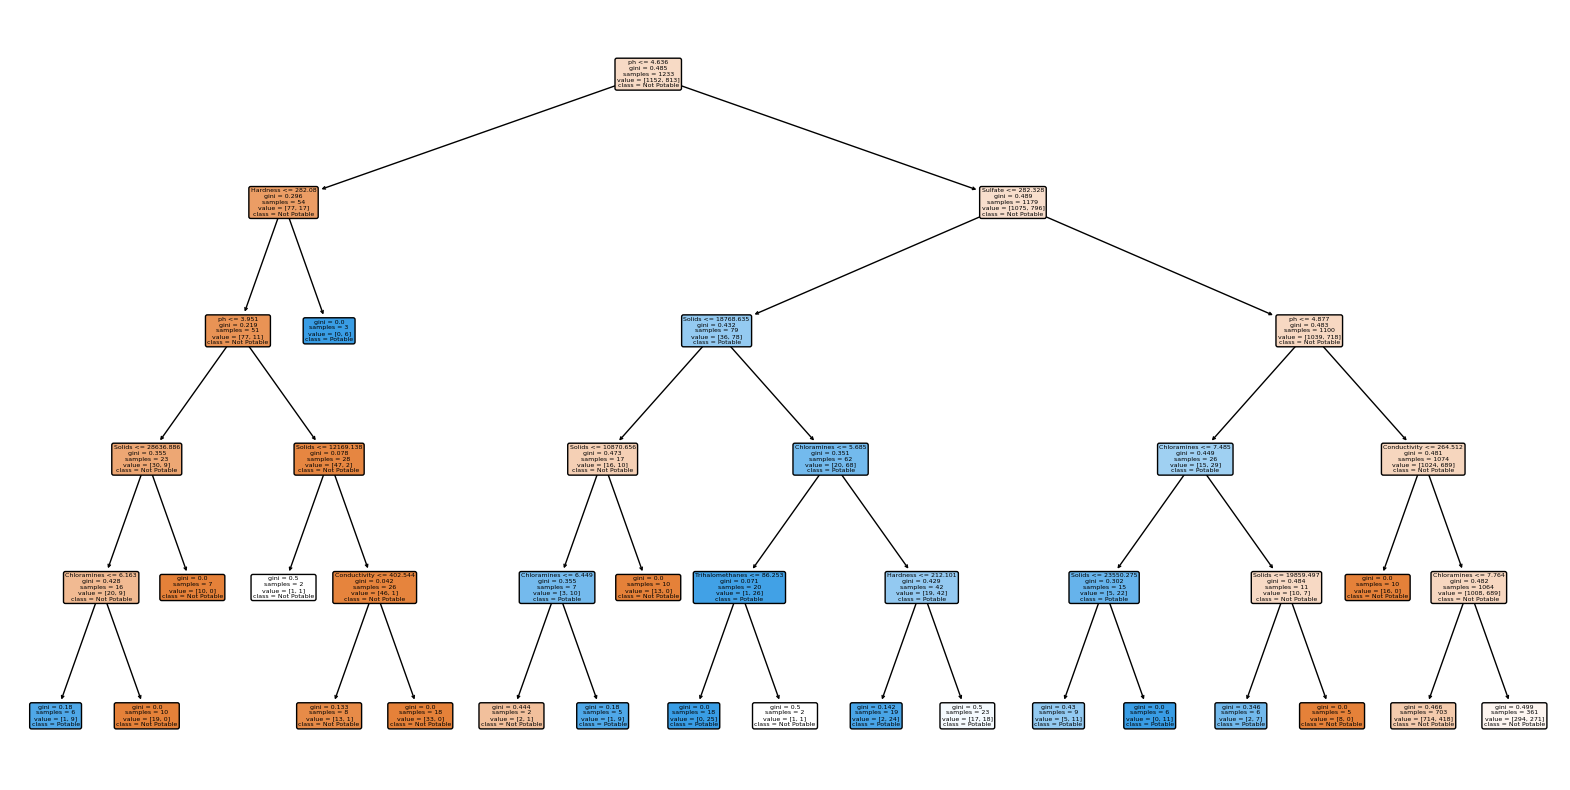

In [70]:
rf_clas1 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=1)
rf_clas1.fit(X_train1, y_train1)

y_pred_clas1 = rf_clas1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred_clas1)
precision1 = precision_score(y_test1, y_pred_clas1)
recall1 = recall_score(y_test1, y_pred_clas1)
f1_score1 = f1_score(y_test1, y_pred_clas1)


print("\nConfusion Matrix Test Size 1:")
print(confusion_matrix(y_test1, y_pred_clas1))
print("\nClassification Report Test Size 1:")
print(classification_report(y_test1, y_pred_clas1))

rf_clas1.fit(X_train2, y_train2)

y_pred_clas2 = rf_clas1.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred_clas2)
precision2 = precision_score(y_test2, y_pred_clas2)
recall2 = recall_score(y_test2, y_pred_clas2)
f1_score2 = f1_score(y_test2, y_pred_clas2)


print("\nConfusion Matrix Test Size 2:")
print(confusion_matrix(y_test2, y_pred_clas2))
print("\nClassification Report Test Size 2:")
print(classification_report(y_test2, y_pred_clas2))

rf_clas1.fit(X_train3, y_train3)

y_pred_clas3 = rf_clas1.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred_clas3)
precision3 = precision_score(y_test3, y_pred_clas3)
recall3 = recall_score(y_test3, y_pred_clas3)
f1_score3 = f1_score(y_test3, y_pred_clas3)


print("\nConfusion Matrix Test Size 3:")
print(confusion_matrix(y_test3, y_pred_clas3))
print("\nClassification Report Test Size 3:")
print(classification_report(y_test3, y_pred_clas3))

bar_width = 0.2

# Membuat array untuk posisi x untuk tiga bar chart pada setiap label
x_values = np.arange(4)

# Membuat bar chart untuk setiap dataset pada setiap label
plt.bar(x_values - 1.5*bar_width, [accuracy1, precision1, recall1, f1_score1], width=bar_width, label='Test Size 1')
plt.bar(x_values - 0.5*bar_width, [accuracy2, precision2, recall2, f1_score2], width=bar_width, label='Test Size 2')
plt.bar(x_values + 0.5*bar_width, [accuracy3, precision3, recall3, f1_score3], width=bar_width, label='Test Size 3')

plt.xlabel('Metrics')
plt.ylabel('Values')

# Menambahkan legend dan menyesuaikan posisi
plt.legend(loc='upper right')

# Menambahkan label untuk setiap bar chart
plt.xticks(x_values, ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Menampilkan plot
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(rf_clas1.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()




Skema 2 n_estimator = 200, max_depth=10


Confusion Matrix Test Size 1:
[[391  21]
 [192  52]]

Classification Report Test Size 1:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       412
           1       0.71      0.21      0.33       244

    accuracy                           0.68       656
   macro avg       0.69      0.58      0.56       656
weighted avg       0.69      0.68      0.62       656


Confusion Matrix Test Size 2:
[[580  30]
 [282  91]]

Classification Report Test Size 2:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       610
           1       0.75      0.24      0.37       373

    accuracy                           0.68       983
   macro avg       0.71      0.60      0.58       983
weighted avg       0.70      0.68      0.63       983


Confusion Matrix Test Size 3:
[[779  49]
 [363 120]]

Classification Report Test Size 3:
              precision    recall  f1-score   support

           0       0.

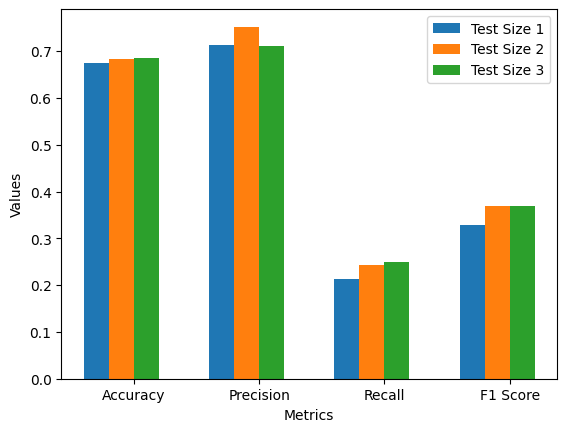

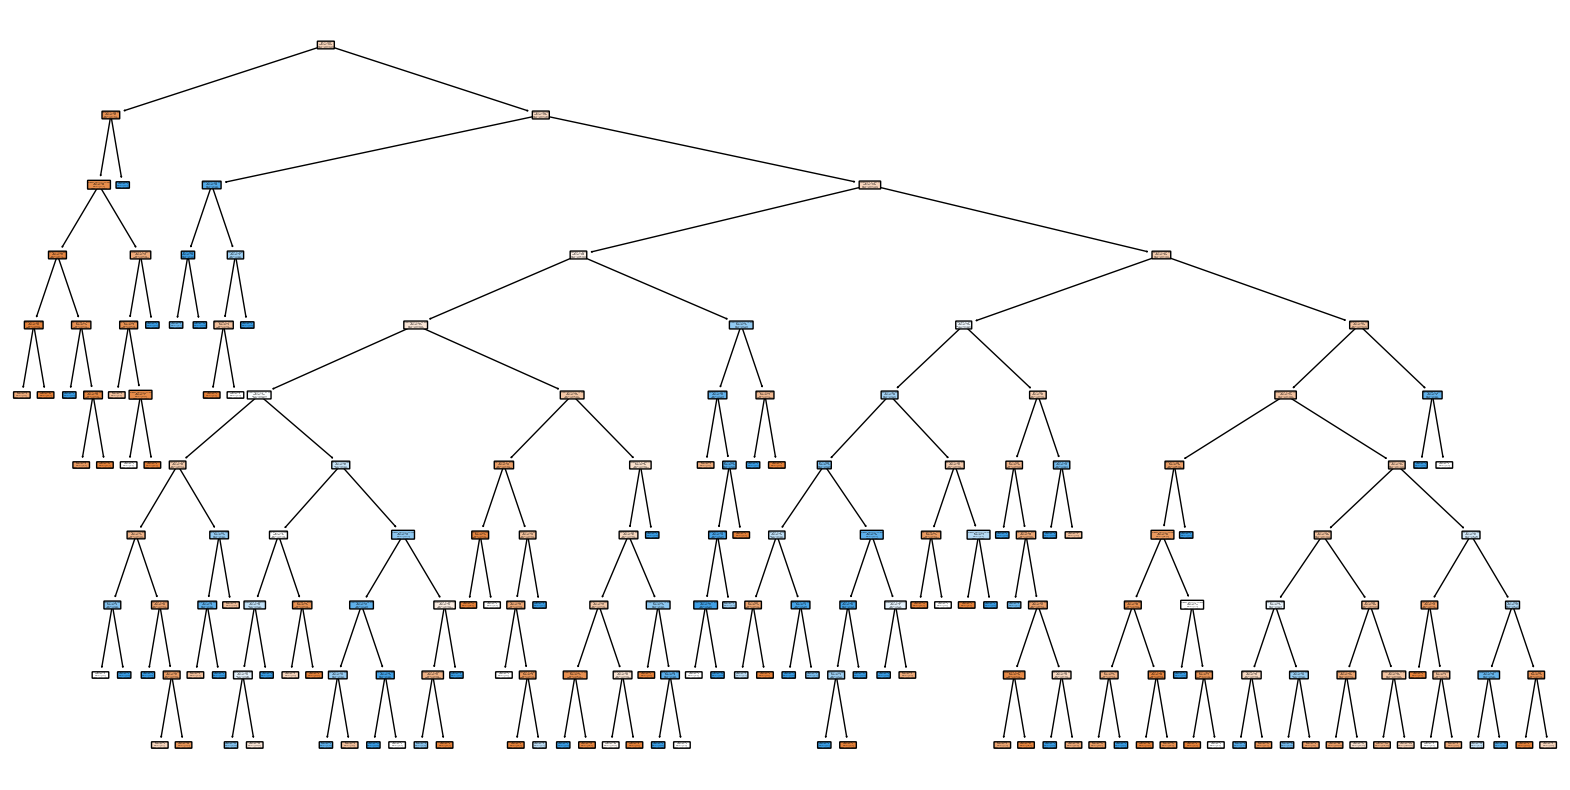

In [72]:
rf_clas2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_clas2.fit(X_train1, y_train1)

y_pred_clas1 = rf_clas2.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred_clas1)
precision1 = precision_score(y_test1, y_pred_clas1)
recall1 = recall_score(y_test1, y_pred_clas1)
f1_score1 = f1_score(y_test1, y_pred_clas1)


print("\nConfusion Matrix Test Size 1:")
print(confusion_matrix(y_test1, y_pred_clas1))
print("\nClassification Report Test Size 1:")
print(classification_report(y_test1, y_pred_clas1))

rf_clas2.fit(X_train2, y_train2)

y_pred_clas2 = rf_clas2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred_clas2)
precision2 = precision_score(y_test2, y_pred_clas2)
recall2 = recall_score(y_test2, y_pred_clas2)
f1_score2 = f1_score(y_test2, y_pred_clas2)


print("\nConfusion Matrix Test Size 2:")
print(confusion_matrix(y_test2, y_pred_clas2))
print("\nClassification Report Test Size 2:")
print(classification_report(y_test2, y_pred_clas2))

rf_clas2.fit(X_train3, y_train3)

y_pred_clas3 = rf_clas2.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred_clas3)
precision3 = precision_score(y_test3, y_pred_clas3)
recall3 = recall_score(y_test3, y_pred_clas3)
f1_score3 = f1_score(y_test3, y_pred_clas3)


print("\nConfusion Matrix Test Size 3:")
print(confusion_matrix(y_test3, y_pred_clas3))
print("\nClassification Report Test Size 3:")
print(classification_report(y_test3, y_pred_clas3))

bar_width = 0.2

# Membuat array untuk posisi x untuk tiga bar chart pada setiap label
x_values = np.arange(4)

# Membuat bar chart untuk setiap dataset pada setiap label
plt.bar(x_values - 1.5*bar_width, [accuracy1, precision1, recall1, f1_score1], width=bar_width, label='Test Size 1')
plt.bar(x_values - 0.5*bar_width, [accuracy2, precision2, recall2, f1_score2], width=bar_width, label='Test Size 2')
plt.bar(x_values + 0.5*bar_width, [accuracy3, precision3, recall3, f1_score3], width=bar_width, label='Test Size 3')

plt.xlabel('Metrics')
plt.ylabel('Values')

# Menambahkan legend dan menyesuaikan posisi
plt.legend(loc='upper right')

# Menambahkan label untuk setiap bar chart
plt.xticks(x_values, ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Menampilkan plot
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(rf_clas2.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()


Skema 3 n_estimator = 300, max_depth=20


Confusion Matrix Test Size 1:
[[376  36]
 [170  74]]

Classification Report Test Size 1:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       412
           1       0.67      0.30      0.42       244

    accuracy                           0.69       656
   macro avg       0.68      0.61      0.60       656
weighted avg       0.68      0.69      0.65       656


Confusion Matrix Test Size 2:
[[557  53]
 [250 123]]

Classification Report Test Size 2:
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       610
           1       0.70      0.33      0.45       373

    accuracy                           0.69       983
   macro avg       0.69      0.62      0.62       983
weighted avg       0.69      0.69      0.66       983


Confusion Matrix Test Size 3:
[[742  86]
 [320 163]]

Classification Report Test Size 3:
              precision    recall  f1-score   support

           0       0.

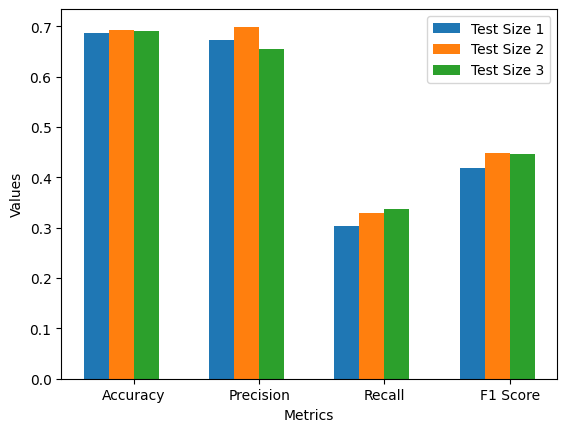

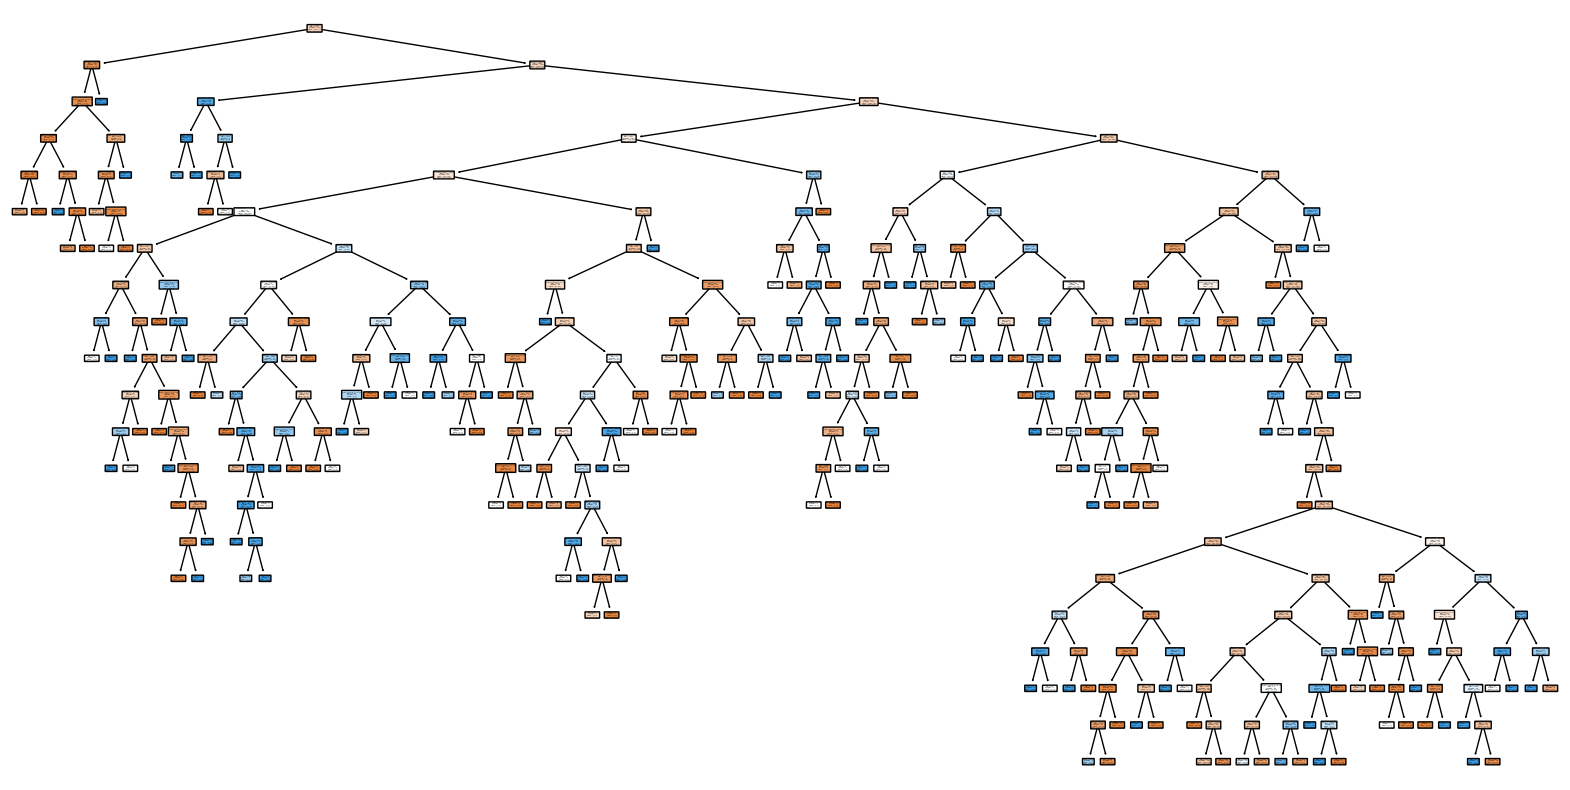

In [73]:
rf_clas3 = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_clas3.fit(X_train1, y_train1)

y_pred_clas1 = rf_clas3.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred_clas1)
precision1 = precision_score(y_test1, y_pred_clas1)
recall1 = recall_score(y_test1, y_pred_clas1)
f1_score1 = f1_score(y_test1, y_pred_clas1)


print("\nConfusion Matrix Test Size 1:")
print(confusion_matrix(y_test1, y_pred_clas1))
print("\nClassification Report Test Size 1:")
print(classification_report(y_test1, y_pred_clas1))

rf_clas3.fit(X_train2, y_train2)

y_pred_clas2 = rf_clas3.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred_clas2)
precision2 = precision_score(y_test2, y_pred_clas2)
recall2 = recall_score(y_test2, y_pred_clas2)
f1_score2 = f1_score(y_test2, y_pred_clas2)


print("\nConfusion Matrix Test Size 2:")
print(confusion_matrix(y_test2, y_pred_clas2))
print("\nClassification Report Test Size 2:")
print(classification_report(y_test2, y_pred_clas2))

rf_clas3.fit(X_train3, y_train3)

y_pred_clas3 = rf_clas3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred_clas3)
precision3 = precision_score(y_test3, y_pred_clas3)
recall3 = recall_score(y_test3, y_pred_clas3)
f1_score3 = f1_score(y_test3, y_pred_clas3)


print("\nConfusion Matrix Test Size 3:")
print(confusion_matrix(y_test3, y_pred_clas3))
print("\nClassification Report Test Size 3:")
print(classification_report(y_test3, y_pred_clas3))

bar_width = 0.2

# Membuat array untuk posisi x untuk tiga bar chart pada setiap label
x_values = np.arange(4)

# Membuat bar chart untuk setiap dataset pada setiap label
plt.bar(x_values - 1.5*bar_width, [accuracy1, precision1, recall1, f1_score1], width=bar_width, label='Test Size 1')
plt.bar(x_values - 0.5*bar_width, [accuracy2, precision2, recall2, f1_score2], width=bar_width, label='Test Size 2')
plt.bar(x_values + 0.5*bar_width, [accuracy3, precision3, recall3, f1_score3], width=bar_width, label='Test Size 3')

plt.xlabel('Metrics')
plt.ylabel('Values')

# Menambahkan legend dan menyesuaikan posisi
plt.legend(loc='upper right')

# Menambahkan label untuk setiap bar chart
plt.xticks(x_values, ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Menampilkan plot
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(rf_clas3.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()
